# Analisis Exploratorio de Datos
En este Notebook se realiza un analisis exploratorio de datos sobre un dataset que contiene datos que cubren las 5 mejores ligas de futbol de Europa de 2014 a 2020. Está estructurada como una base de datos relacional.

  * **apariciones**, Every appearance a player has made in one of the Top5 leagues over the specified time      window 
  * **juegos**, All games played in one of the Top5 leagues over the specified time window
  * **equipos**, Game statistics by team in one of the Top5 leagues over the specified time window
  
  Las etapas que se siguen son las siguientes: 
  1. Combinación/Reducción de tablas (ver notebook de analisis inicial) 
  1. Importación de librerias
  1. Carga tablas finales
  1. Exploración de los datos
  1. Formulación de preguntas
  1. EDA


## 2. Importación de librerias 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

## 3. Carga de tablas finales

### Tabla apariciones


In [4]:
apariciones=pd.read_csv('./../datos/appearances_leagues_games.csv')
apariciones.head(2)

,gameID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,...,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,name_player,name_league,season,date
0,81,0,0,0,0.0,0.000000,0.000000,0,0,0.0,...,1,0,0,90,0,0,Sergio Romero,Premier League,2015,2015-08-08 15:45:00
1,91,0,0,0,0.0,0.058938,0.058938,0,0,0.0,...,1,0,0,90,0,0,Sergio Romero,Premier League,2015,2015-08-14 22:45:00


### Tabla juegos

In [5]:
juegos=pd.read_csv('./../datos/games_leagues_teams.csv')
juegos.head(2)

,gameID,season,date,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,awayGoalsHalfTime,name_league,homeTeam,awayTeam
0,81,2015,2015-08-08 15:45:00,1,0,0.2843,0.3999,0.3158,1,0,Premier League,Manchester United,Tottenham
1,3122,2016,2016-12-11 18:15:00,1,0,0.4325,0.3292,0.2383,1,0,Premier League,Manchester United,Tottenham


### Tabla equipos

In [6]:
equipos=pd.read_csv('./../datos/teamstats_teams.csv')
equipos.head(2)

,gameID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result,name_team,name_league
0,81,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W,Manchester United,Premier League
1,81,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L,Tottenham,Premier League


##  4. Exploración de los datos 

In [4]:
#forma de los datos
apariciones.shape

(356513, 21)

In [77]:
apariciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356513 entries, 0 to 356512
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameID         356513 non-null  int64  
 1   goals          356513 non-null  int64  
 2   ownGoals       356513 non-null  int64  
 3   shots          356513 non-null  int64  
 4   xGoals         356513 non-null  float64
 5   xGoalsChain    356513 non-null  float64
 6   xGoalsBuildup  356513 non-null  float64
 7   assists        356513 non-null  int64  
 8   keyPasses      356513 non-null  int64  
 9   xAssists       356513 non-null  float64
 10  position       356513 non-null  object 
 11  positionOrder  356513 non-null  int64  
 12  yellowCard     356513 non-null  int64  
 13  redCard        356513 non-null  int64  
 14  time           356513 non-null  int64  
 15  substituteIn   356513 non-null  int64  
 16  substituteOut  356513 non-null  int64  
 17  name_player    356513 non-nul

In [72]:
#forma de los datos
juegos.shape

(12680, 13)

In [73]:
juegos.dtypes

gameID                 int64
season                 int64
date                  object
homeGoals              int64
awayGoals              int64
homeProbability      float64
drawProbability      float64
awayProbability      float64
homeGoalsHalfTime      int64
awayGoalsHalfTime      int64
name_league           object
homeTeam              object
awayTeam              object
dtype: object

In [74]:
equipos.shape

(25360, 17)

In [76]:
equipos.dtypes

gameID             int64
season             int64
date              object
location          object
goals              int64
xGoals           float64
shots              int64
shotsOnTarget      int64
deep               int64
ppda             float64
fouls              int64
corners            int64
yellowCards      float64
redCards           int64
result            object
name_team         object
name_league       object
dtype: object

## 5. Formulación de preguntas

* ¿Cuantos goles se marcarón por liga la última temporada?
* ¿Quién es el jugador con más goles por liga la última temporada?
* ¿Quién es el jugador con más disparos por liga la última temporada?
* Tasa de conversión de los máximos anotadores de la última temporada por liga (goals/shots)
* Tasa de conversión de los máximos anotadores desde 2014 a 2020(goals/shots)
* ¿Quién es el jugador con más asistencias por liga la última temporada?
* ¿Equipo con más goles de local por liga la última temporada?
* ¿Equipo con más goles de visitante por liga la última temporada?
* ¿Cuál es el total de partidos por liga?
* ¿Equipos con mayor Precisión del tiro por liga la última temporada? shotsOnTarget/shots (shooting accuracy)
* ¿En que liga se empatarón más partidos en la última temporada?
* ¿Cual es el porcentaje de partidos empatados por liga? (empatados/juegos)



## 6. EDA

### ¿Cuantos goles se marcarón por liga la última temporada?

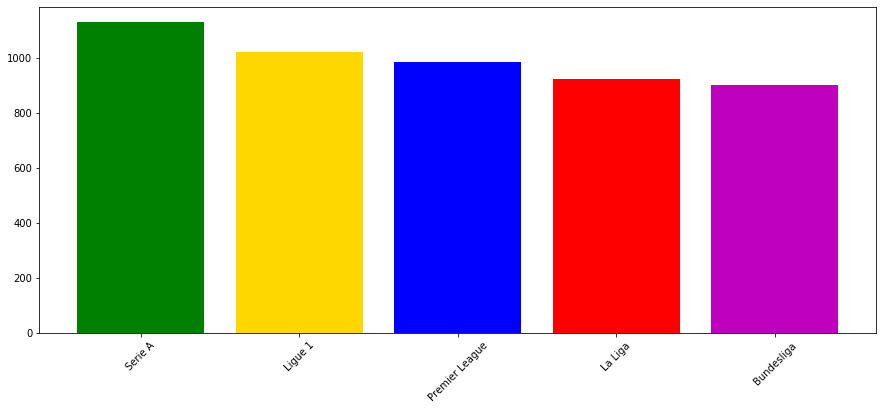

In [37]:
#Filtro booleano
temporada_2020= apariciones['season'] == 2020

#Filtro de datos
apariciones_2020 = apariciones[temporada_2020]
apariciones_2020

#agrupar por liga y suma goles
golesxLiga_2020=apariciones_2020.groupby(['name_league', 'season']).sum()['goals'].reset_index()
golesxLiga_2020

#crear dataframe y gráfico de barras
golesxLiga_2020_df=pd.DataFrame(golesxLiga_2020)
golesxLiga_2020_df=golesxLiga_2020_df.sort_values(by=['goals'], ascending=False, ignore_index=True)
plt.bar(golesxLiga_2020_df['name_league'], golesxLiga_2020_df['goals'], color=['g', 'gold', 'b', 'r', 'm'])
plt.xticks(rotation=45)
plt.rcParams["figure.figsize"] = (10, 3)  
plt.show()

### ¿Quién es el jugador con más goles por liga la última temporada?


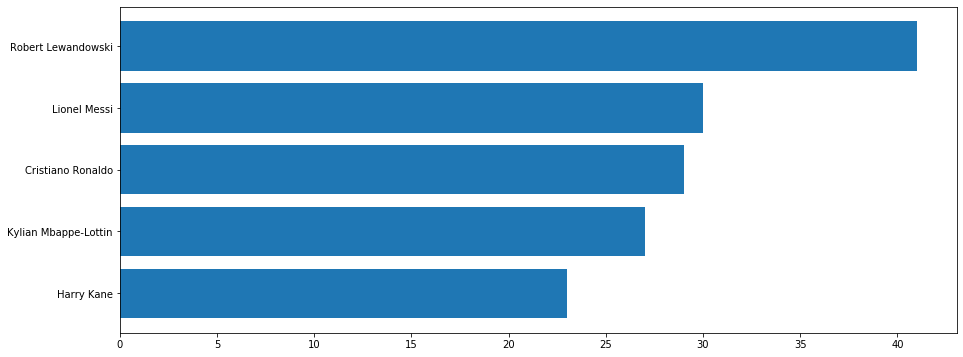

In [28]:
#agrupar por liga y suma goles
max_anotador2020=apariciones_2020.groupby(['name_player', 'name_league', 'season']).sum()['goals']


##crear dataframe y ordenar descendente goles
max_anotador2020_df=pd.DataFrame(max_anotador2020)
max_anotador2020_df=max_anotador2020_df.sort_values(by=['goals'], ascending=False)

liga_maxgoles=max_anotador2020_df.reset_index().groupby(['name_league']).first() #maximo anotador por liga
liga_maxgoles=liga_maxgoles.sort_values(by=['goals'], ascending=True)
liga_maxgoles
plt.barh(liga_maxgoles['name_player'], liga_maxgoles['goals'])
plt.rcParams["figure.figsize"] = (15, 6)  
plt.show()

### ¿Quién es el jugador con más disparos por liga la última temporada?

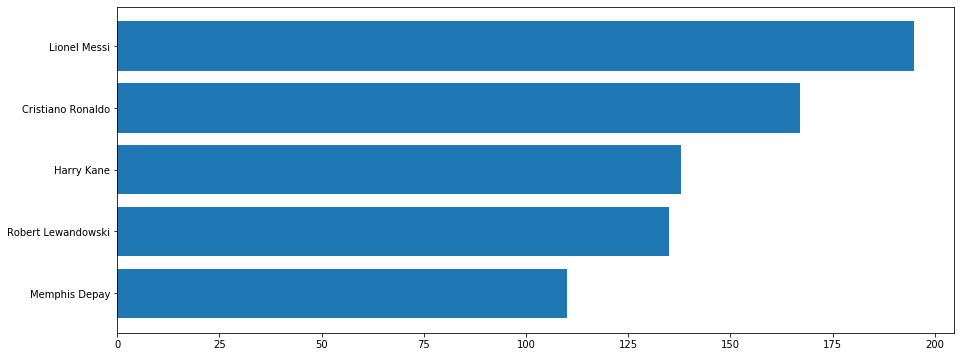

In [29]:
#agrupar por liga y suma goles
max_tirador2020=apariciones_2020.groupby(['name_league', 'name_player', 'season']).sum()['shots']

##crear dataframe y ordenar descendente goles
max_tirador2020_df=pd.DataFrame(max_tirador2020)
max_tirador2020_df=max_tirador2020_df.sort_values(by=['shots'], ascending=False)

max_tirador2020_df=max_tirador2020_df.reset_index().groupby(['name_league']).first()
max_tirador2020_df=max_tirador2020_df.sort_values(by=['shots'], ascending=True)
plt.barh(max_tirador2020_df['name_player'], max_tirador2020_df['shots'])
plt.rcParams["figure.figsize"] = (15, 6)  
plt.show()

### Tasa de conversión de los máximos anotadores de la última temporada por liga (goals/shots) 

In [11]:
columnas_interes = ['goals', 'shots']
apariciones_2020[columnas_interes]

#agrupar por liga y suma goles y disparos
max_efect2020=apariciones_2020.groupby(['name_player', 'name_league', 'season']).sum()[columnas_interes]


##crear dataframe y ordenar descendente goles
max_efect2020_df=pd.DataFrame(max_efect2020)
max_efect2020_df=max_efect2020_df.sort_values(by=['goals'], ascending=False)


max_efect2020_df=max_efect2020_df.reset_index().groupby(['name_league']).first() #maximo anotador por liga

#comparar disparos con goles de los maximos anotadores de cada liga(goals/shots)  Tasa de conversión de disparos
max_efect2020_df['shot_conversion_rate'] = (max_efect2020_df['goals']/ max_efect2020_df['shots'])*100
max_efect2020_df=max_efect2020_df.sort_values(by=['shot_conversion_rate'], ascending=False)
max_efect2020_df

,name_player,season,goals,shots,shot_conversion_rate
name_league,,,,,
Bundesliga,Robert Lewandowski,2020,41,135,30.370370
Ligue 1,Kylian Mbappe-Lottin,2020,27,103,26.213592
Serie A,Cristiano Ronaldo,2020,29,167,17.365269
Premier League,Harry Kane,2020,23,138,16.666667
La Liga,Lionel Messi,2020,30,195,15.384615


### Tasa de conversión de los máximos anotadores desde 2014 a 2020(goals/shots)


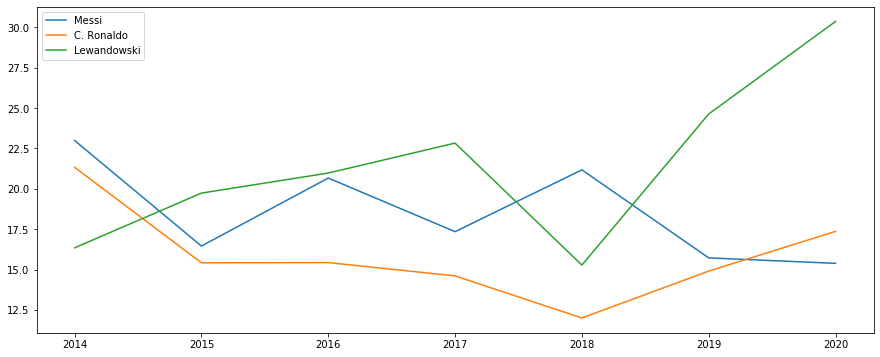

In [30]:
#Filtro 
cond1 = apariciones['name_player'] == 'Cristiano Ronaldo'
cond2 = apariciones['name_player'] == 'Lionel Messi'
cond3 = apariciones['name_player'] == 'Robert Lewandowski'
messi_cr7=apariciones[cond1 | cond2 | cond3]

columnas_interes = ['goals', 'shots']
apariciones_2020[columnas_interes]

#agrupar por liga y suma goles y disparos
messi_cr7=messi_cr7.groupby(['season', 'name_player', 'name_league']).sum()[columnas_interes]

#comparar disparos con goles de los maximos anotadores de cada liga(goals/shots)  Tasa de conversión de disparos
messi_cr7['shot_conversion_rate'] = (messi_cr7['goals']/ messi_cr7['shots'])*100
messi_cr7=messi_cr7.sort_values(by=['season'], ascending=False).reset_index()

# calculando datasets por jugador
messi_rate = messi_cr7[messi_cr7['name_player'] == 'Lionel Messi']
cristiano_rate= messi_cr7[messi_cr7['name_player'] == 'Cristiano Ronaldo']
robert_rate= messi_cr7[messi_cr7['name_player'] == 'Robert Lewandowski']

# haciendo la grafica
plt.plot(messi_rate['season'], messi_rate['shot_conversion_rate'], label='Messi')
plt.plot(cristiano_rate['season'], cristiano_rate['shot_conversion_rate'], label='C. Ronaldo')
plt.plot(robert_rate['season'], robert_rate['shot_conversion_rate'], label='Lewandowski')
plt.legend()
plt.rcParams["figure.figsize"] = (15, 6)  
plt.show()

### ¿Quién es el jugador con más asistencias por liga la última temporada?

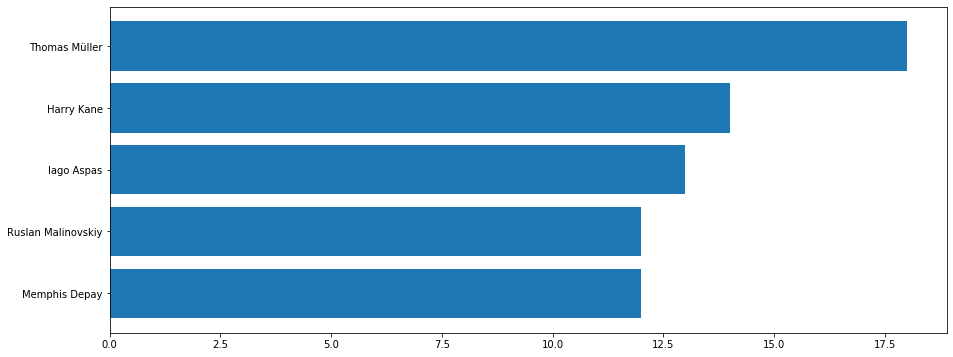

In [31]:
#agrupar por liga y suma goles
max_asistidor2020=apariciones_2020.groupby(['name_league', 'name_player', 'season']).sum()['assists']

##crear dataframe y ordenar descendente asistencias
max_asistidor2020_df=pd.DataFrame(max_asistidor2020)
max_asistidor2020_df=max_asistidor2020_df.sort_values(by=['assists'], ascending=False)


max_asistidor2020_df=max_asistidor2020_df.reset_index().groupby(['name_league']).first()
max_asistidor2020_df=max_asistidor2020_df.sort_values(by=['assists'], ascending=True)
plt.barh(max_asistidor2020_df['name_player'], max_asistidor2020_df['assists'])
plt.rcParams["figure.figsize"] = (15, 6)  
plt.show()

### Juegos


### ¿Equipo con más goles de local por liga la última temporada?


In [14]:
 #¿Equipo con más goles de local por liga la última temporada?
#Filtro booleano
temporada_2020_teams= juegos['season'] == 2020

#Filtro de datos
temporada_2020_teams = juegos[temporada_2020_teams]


#crear datafarame y ordenar de forma descendente
homeGoals_2020_df=pd.DataFrame(temporada_2020_teams.groupby(['name_league', 'homeTeam']).sum()['homeGoals'])
homeGoals_2020_df=homeGoals_2020_df.sort_values(by=['homeGoals'], ascending=False)

#obtener el primero de cada liga
homeGoals_2020_df=homeGoals_2020_df.reset_index().groupby(['name_league']).first()
homeGoals_2020_df=homeGoals_2020_df.sort_values(by=['homeGoals'], ascending=False)
homeGoals_2020_df

,homeTeam,homeGoals
name_league,,
Bundesliga,Bayern Munich,64
Serie A,Inter,53
La Liga,Barcelona,44
Ligue 1,Paris Saint Germain,44
Premier League,Manchester City,43


### ¿Equipo con más goles de visitante por liga la última temporada?


In [15]:
 #¿Equipo con más goles de visitante por liga la última temporada?

#crear datafarame y ordenar de forma descendente
awayGoals_2020_df=pd.DataFrame(temporada_2020_teams.groupby(['name_league', 'awayTeam']).sum()['awayGoals'])
awayGoals_2020_df=awayGoals_2020_df.sort_values(by=['awayGoals'], ascending=False)

#obtener el primero de cada liga
awayGoals_2020_df=awayGoals_2020_df.reset_index().groupby(['name_league']).first()
awayGoals_2020_df=awayGoals_2020_df.sort_values(by=['awayGoals'], ascending=False)
awayGoals_2020_df

,awayTeam,awayGoals
name_league,,
Serie A,AC Milan,43
Ligue 1,Paris Saint Germain,42
La Liga,Barcelona,41
Premier League,Manchester City,40
Bundesliga,Borussia Dortmund,35


### ¿Cuál es el total de partidos por liga la última temporada?


In [16]:

num_juegos=pd.DataFrame(temporada_2020_teams.groupby('name_league').count()['gameID'])
num_juegos = num_juegos.rename(columns={'gameID':'total_games'}).reset_index()
num_juegos

,name_league,total_games
0,Bundesliga,306
1,La Liga,380
2,Ligue 1,380
3,Premier League,380
4,Serie A,380


### ¿Equipos con mayor Precisión del tiro por liga la última temporada? shotsOnTarget/shots (shooting accuracy)


In [18]:
#Filtro booleano
equipos_2020= equipos['season'] == 2020

#Filtro de datos
equipos_2020 = equipos[equipos_2020]

columnas_interes2 = ['shotsOnTarget', 'shots']
equipos_2020[columnas_interes2]

#agrupar por liga y suma disparos a puerta y disparos
precision_tiros=equipos_2020.groupby(['name_league', 'name_team', 'season']).sum()[columnas_interes2]

#A calculation of Shots on target divided by all shots(shotsOnTarget/shots)  precisión de tiro
precision_tiros['shooting_accuracy'] = (precision_tiros['shotsOnTarget']/ precision_tiros['shots'])
precision_tiros=precision_tiros.sort_values(by=['shooting_accuracy'], ascending=False).reset_index()
precision_tiros=precision_tiros.groupby(['name_league']).first()
precision_tiros= precision_tiros.reset_index()
precision_tiros

,name_league,name_team,season,shotsOnTarget,shots,shooting_accuracy
0,Bundesliga,Bayern Munich,2020,234,576,0.406250
1,La Liga,Barcelona,2020,242,582,0.415808
2,Ligue 1,Lyon,2020,238,612,0.388889
3,Premier League,Manchester United,2020,212,525,0.403810
4,Serie A,Atalanta,2020,232,621,0.373591


### ¿En que liga se empatarón más partidos en la última temporada?


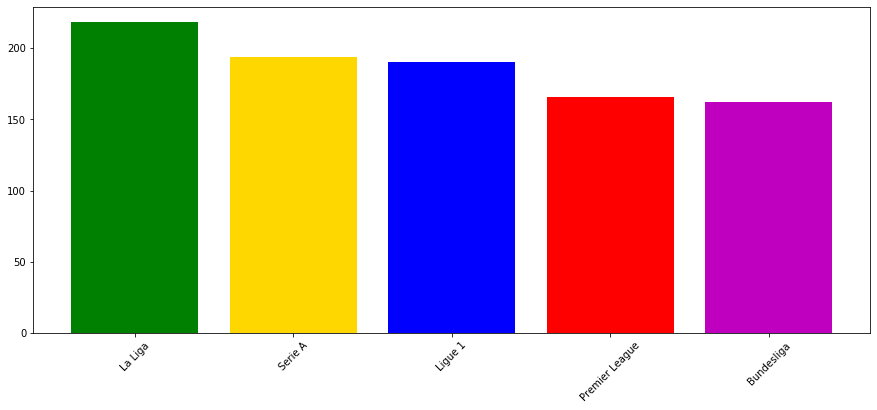

In [42]:
empates_2020=equipos_2020[equipos_2020['result'] == 'D']
empates_df=pd.DataFrame(empates_2020.groupby('name_league').count()['result'])
empates_df=empates_df.sort_values(by='result', ascending=False).reset_index()
empates_df = empates_df.rename(columns={'result':'total_draw'})
plt.bar(empates_df['name_league'], empates_df['total_draw'], color=['g', 'gold', 'b', 'r', 'm'])
plt.xticks(rotation=45)
plt.rcParams["figure.figsize"] = (10, 6)  
plt.show()

### ¿Cual es el porcentaje de partidos empatados por liga? (empatados/juegos)


In [44]:
porcetaje_empate = pd.merge(num_juegos, empates_df[['total_draw', 'name_league']], on=["name_league"])

#comparación partidos totales con empatados (total_draw/total_games)*100
porcetaje_empate['draw_rate'] = (porcetaje_empate['total_draw']/ porcetaje_empate['total_games'])*100
porcetaje_empate=porcetaje_empate.sort_values(by=['draw_rate'], ascending=False).reset_index()
porcetaje_empate

,index,name_league,total_games,total_draw,draw_rate
0,1,La Liga,380,218,57.368421
1,0,Bundesliga,306,162,52.941176
2,4,Serie A,380,194,51.052632
3,2,Ligue 1,380,190,50.000000
4,3,Premier League,380,166,43.684211


In [ ]:
porcetaje_empate

In [ ]:
## pasos del EDA para desarrollo de articulo
## grafica de porcentajes por liga
## decimales 
## en diagonal etiquetas barras

